# The Realtionship between user type, duration of trips, and start day.
## by Heba Ashour

## Investigation Overview

In this investigation, I was interested in answer the following questions:
1. When are most trips taken in terms of day of the week?
2. How long does the average trip take?
3. Does the above depend on if a user is a subscriber or customer?

## Dataset Overview

The data consisted of containing information about individual rides made in a bike-sharing system for 183412 rides. The attributes included features that related to trips (start_day, start_hour, duration_hours) and other related to members (member_age, user_type: Subscriber or Customer, member_gender, bike_share_for_all_trip).

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
trips = pd.read_csv('./data/trips.csv')

## Proportion of User Type

The user type in the data is either **Subscirber** or **Customer**. The percent of **Subscirber** is 90.5% of the members and the **Customer** is 9.5% of the members. As a result; the number of **Subscirber** is lager than the number of **Customer**.

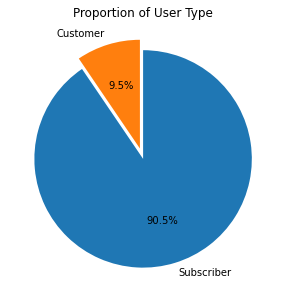

In [3]:
plt.figure(figsize=(20, 5))

user_types_counts = trips['user_type'].value_counts()
plt.pie(user_types_counts.values, labels=user_types_counts.index, startangle=90, 
        counterclock=False, autopct='%1.1f%%',  explode=[0, 0.1]);
plt.title('Proportion of User Type');


## Distrubtion of start day
The most frequent start day is either (*Thursday* or *Tuesday*). Moreover; the least frequent start day is (*Sunday* or *Saturday*)

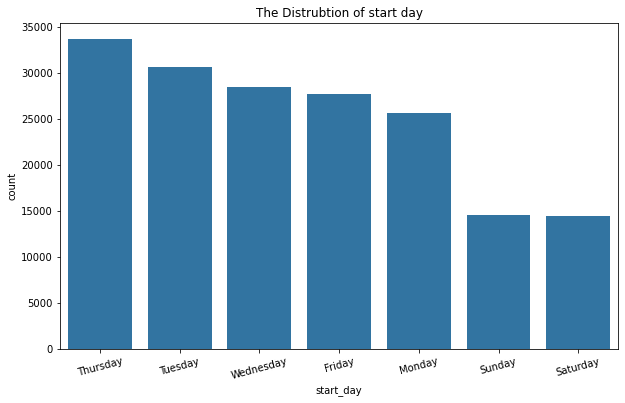

In [4]:
plt.figure(figsize=(10, 6))
base_color = sb.color_palette()[0]
sb.countplot(data=trips, x='start_day', color=base_color, order=trips.start_day.value_counts().index)
plt.xticks(rotation=15)
plt.title('The Distrubtion of start day');

## User Type vs start day

The plot below draw the realtionship between user type and start day. As you can see in the plot below for Customers and Subscribers the less two days of trips are (*Sunday* or *Saturday*). Moreover, in (*Thursday* or *Tuesday*) there are the highest number of trips for **Subscribers**, and in (*Thursday* or *Friday*) for **Customers**.

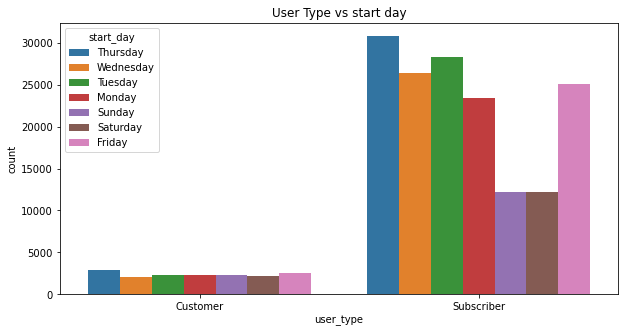

In [5]:
plt.figure(figsize=(10, 5))
sb.countplot(data=trips, x='user_type', hue='start_day')
plt.title("User Type vs start day");

## User Type vs The Mean Duration of the trips (minutes)
The **Customer** users have the higher mean duration of trips(minutes) compared of the **Subscriber** user; with mean for Customer = 21 minutes, and for Subscriber = 10 minutes.

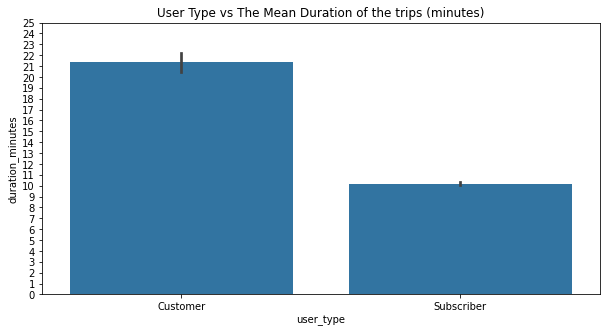

In [6]:
plt.figure(figsize=(10, 5))
yticks = np.arange(0, 25 +1, 1)
sb.barplot(data=trips, x='user_type', y='duration_minutes', color=base_color);
plt.title("User Type vs The Mean Duration of the trips (minutes)")
plt.yticks(yticks);

## User Type and Start day by the Mean Duration of the trips (minutes)

In the plot below we can see that for the days that we said it has the lowest number of trips, (*Sunday* or *Saturday*), it has the longest mean of duration (minutes) for **Subscriber** and **Customer** users. In addition, for **Subscriber** the least day that has the least mean of duration time in minutes are (*Thursday* or *Tuesday*) and for  **Customer** it is (*Thursday* or *Friday*). As a result, this features are related to each other -> The days that has the longest mean of durations(minutes), it is the days that the count of trips are lower, and versa vice.

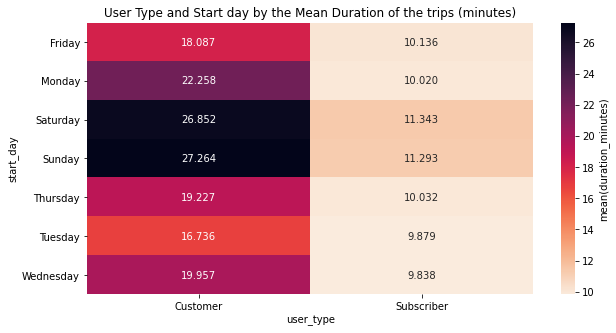

In [7]:
plt.figure(figsize=(10, 5))
duration_means = trips.groupby(['user_type', 'start_day']).mean()['duration_minutes']
duration_means = duration_means.reset_index(name = 'duration_minutes_avg')
duration_means = duration_means.pivot(index = 'start_day', columns = 'user_type',
                            values = 'duration_minutes_avg')
sb.heatmap(duration_means, annot = True, fmt = '.3f', cmap='rocket_r',
           cbar_kws = {'label' : 'mean(duration_minutes)'});
plt.title("User Type and Start day by the Mean Duration of the trips (minutes)");

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!